# ZADANIE 1

a) Wykonaj poniższy skrypt i przeanalizuj go:

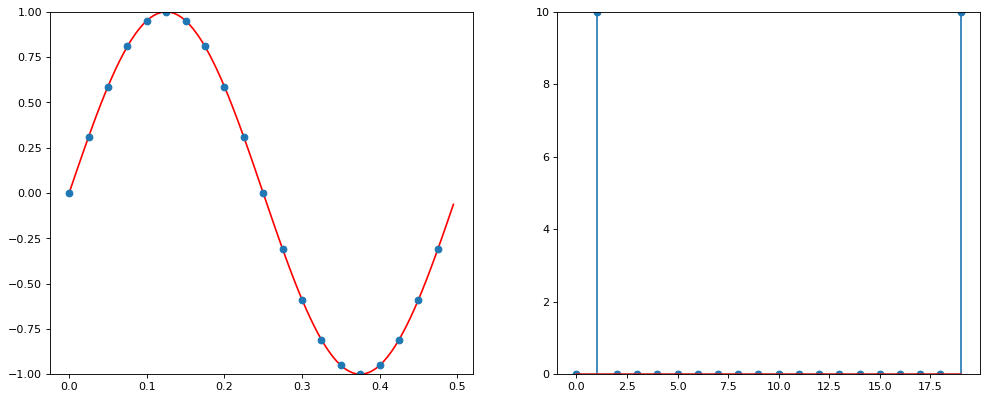

In [4]:
from __future__ import division
from pylab import *
from numpy import *
from scipy import *
from ipywidgets import *
import math as mt

%matplotlib inline

A = 1
# Amplituda sygnału

LP = 1 
# Liczba analizowanych pełnych przebiegów sygnału (okresów)
w = 40           
# czśstotliwość probkowania [Hz] sygnału 
#(jak często w ciągu sekundy pobieramy informacje o wartości sygnału)

f = 2.0           
# Czestotliwosc sygnalu [Hz]

T = 1.0/f        
# Okres sygnalu [s] (jak długo trwa jeden przebieg sinusa)

TW = 1.0/w        
# Okres probkowania [s] (co ile sekund pobieramy próbkę)

t = np.arange(0, LP*T, TW)
# generujemy momenty, w których pobieramy próbki

n = len(t)
    
FUNC = lambda t : A*sin(2*pi*t*f)    
# def. funkcji (tutaj sinus)

signal = FUNC(t)                 
# funkcja sprobkowana

fig = plt.figure(figsize=(15, 6), dpi=80)   
ax = fig.add_subplot(121)
## --- POMOCNICZY SYGNAL
base_t = np.arange(0, LP*T, 1.0/200.0)
base_signal = FUNC(base_t)
ax.plot(base_t, base_signal, linestyle='-', color='red')
ax.set_ylim([min(base_signal), max(base_signal)])
## --- 
ax.plot(t, signal, 'o')

signal1 = fft(signal)
# sygnal w dziedzinie czestotliwosci 
signal1 = abs(signal1)        
# modul sygnalu

freqs = range(int(n))


ax = fig.add_subplot(122)
ymax = max(signal1)
if (ymax > 3.0):
    ax.set_ylim([0.0,ymax])
else:
    ax.set_ylim([0.0,3.0])
stem(freqs, signal1, '-*')

show()

UWAGA: do dalszych ćwiczeń warto powyższy skrypt przekształcić na funkcję o wielu argumentach, typu: amplituda, częstotliwość próbkowania, liczba przebiegów. Oczywiście dla wygody, należy nadać wartości domyślne argumentom funkcji. #DONE

In [2]:
# Zdefiniuj funckję
def many_arguments(A = 1,w = 40,LP = 1, f = 2.0):

    T = 1.0/f        
    # Okres sygnalu [s] (jak długo trwa jeden przebieg sinusa)

    TW = 1.0/w        
    # Okres probkowania [s] (co ile sekund pobieramy próbkę)

    t = np.arange(0, LP*T, TW)
    # generujemy momenty, w których pobieramy próbki

    n = len(t)
        
    FUNC = lambda t : A*sin(2*pi*t*f) 
    # def. funkcji (tutaj sinus)

    signal = FUNC(t)                 
    # funkcja sprobkowana

    fig = plt.figure(figsize=(15, 6), dpi=80)   
    ax = fig.add_subplot(121)
    ## --- POMOCNICZY SYGNAL
    base_t = np.arange(0, LP*T, 1.0/200.0)
    base_signal = FUNC(base_t)
    ax.plot(base_t, base_signal, linestyle='-', color='red')
    ax.set_ylim([min(base_signal), max(base_signal)])
    ## --- 
    ax.plot(t, signal, 'o')

    signal1 = fft(signal)
    # sygnal w dziedzinie czestotliwosci 
    signal1 = abs(signal1)    
    signal1 = [x*2*f/(w*LP)  for x in signal1]
    # modul sygnalu

    freqs = range(int(n))
    freqs = [x/LP*f for x in freqs ]

    ax.set_xlabel("Czas - t[s]")
    ax.set_ylabel("Amplituda - y(t)[j]")
    ax = fig.add_subplot(122)
    ymax = max(signal1)
    if (ymax > 3.0):
        ax.set_ylim([0.0,ymax])
    else:
        ax.set_ylim([0.0,3.0])
    stem(freqs, signal1, '-*')

    ax.set_xlabel("Czestotliwosc - f[hz]")
    ax.set_ylabel("Amplituda - A[j]")

    show()

UWAGA DLA CHĘTNYCH: można wykorzystać 'interact', dzięki któremu można zmieniac parametry danej funkcji i na bieżąco obserwować zmiany. Poniższy kod przedstawia sposób wykorzystania interact: #DONE

In [3]:
interact(many_arguments, A=(0.5,2.5,0.1),w=(0, 100,1),LP=(0.25,10,0.25),f=(0.25,10,0.25))

interactive(children=(FloatSlider(value=1.0, description='A', max=2.5, min=0.5), IntSlider(value=40, descripti…

<function __main__.many_arguments(A=1, w=40, LP=1, f=2.0)>

b) Zmień częstotliwość próbkowania na 50Hz. #DONE

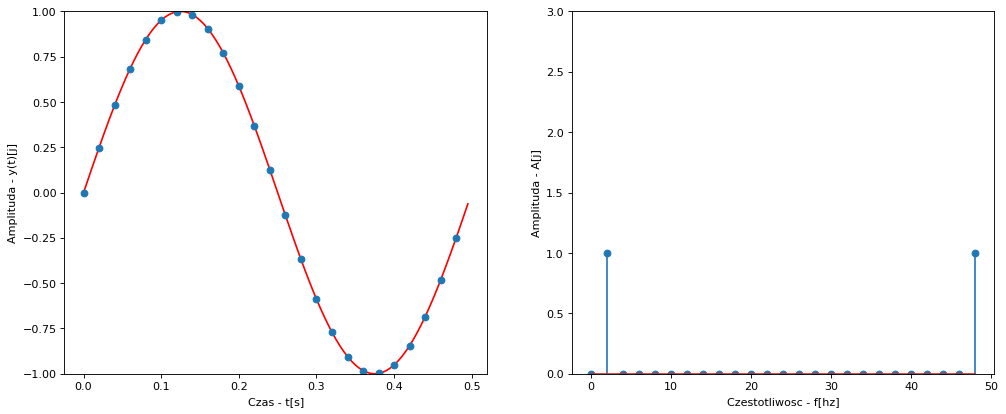

In [4]:
many_arguments(w=50)

c) Punkty na osi OX spektrum są teraz kolejnymi liczbami naturalnymi, a nie częstotliwościami w Hz. Popraw skrypt (funkcje), tak aby oś OX spektrum była w Hz (podpowiedź: oś OX rozpoczyna się od 0Hz, a kończy się na (prawie!)  Hz, gdzie  jest częstotliwością próbkowania). Następnie: Upewnij się, że spektrum dla 1Hz-owego sinusa i pięciu (LP=5) analizowanych przebiegów wygląda teraz prawidłowo. #DONE

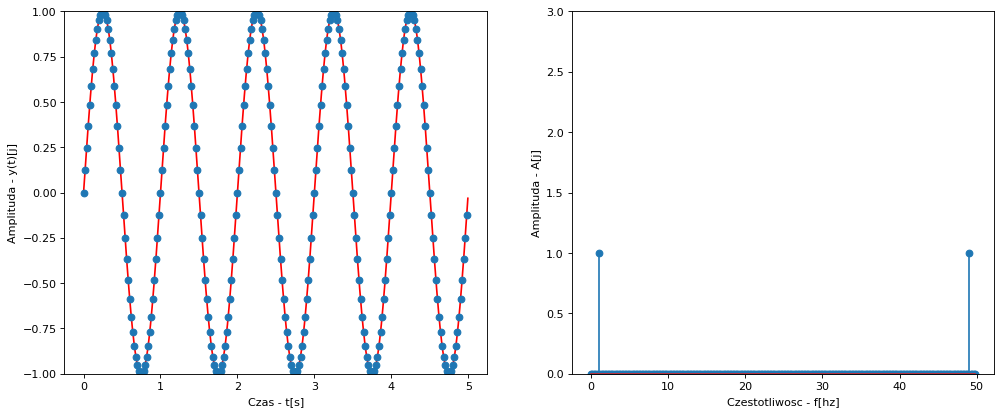

In [5]:
many_arguments(LP=5,w=50,f=1)


d) Podpisz osie obu wykresów, używając funkcji xlabel() i ylabel(). Pamiętaj o jednostkach. #DONE

In [6]:
# Podpisz osie wykresów
interact(many_arguments, A=(0.5,2.5,0.1),w=(0, 100,1),LP=(0.25,10,0.25),f=(0.25,10,0.25))


interactive(children=(FloatSlider(value=1.0, description='A', max=2.5, min=0.5), IntSlider(value=40, descripti…

<function __main__.many_arguments(A=1, w=40, LP=1, f=2.0)>

f) Porównaj spektrum funkcji $sin(2*pi*f*t)$, $2*sin(2*pi*f*t)$ i $3*sin(2*pi*f*t)$. Jak zmienia się wartość na osi OY na wykresie spektrum?

Wartość pików na wykresie spektrum rośnie proporcjonalnie do wartości amplitudy.



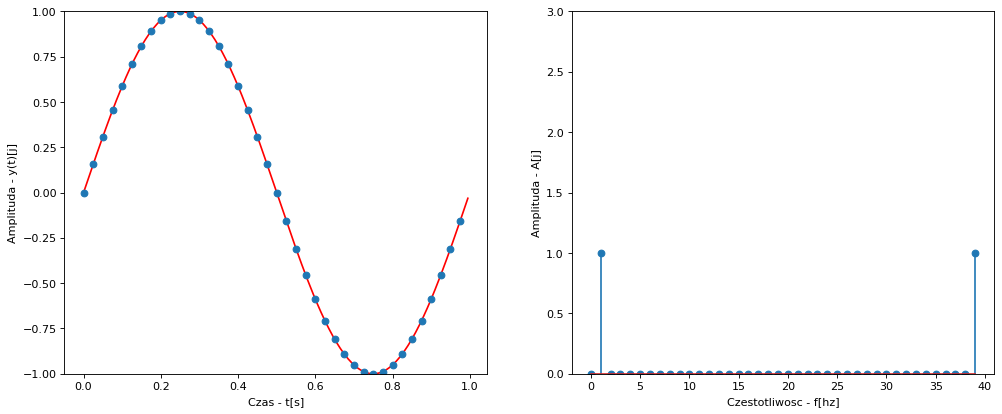

In [7]:
# f=1, A=1, LP=1
many_arguments(f=1, A=1, LP=1)

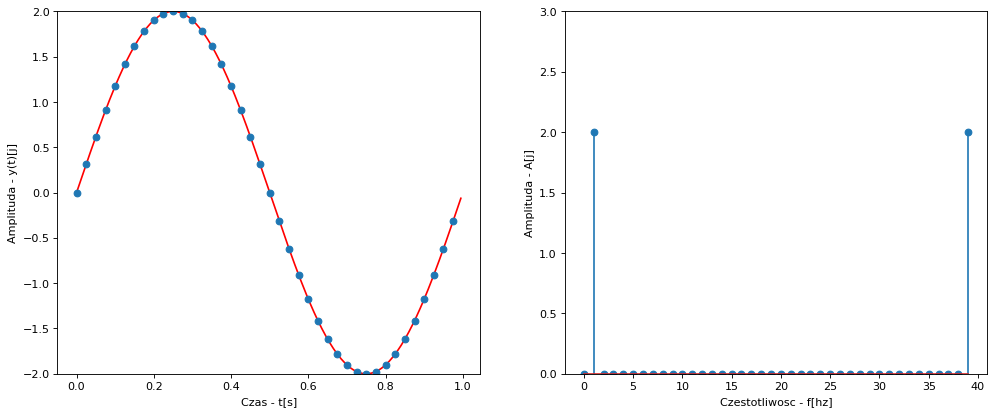

In [7]:
# f=1, A=2, LP=1
many_arguments(f=1, A=2, LP=1)

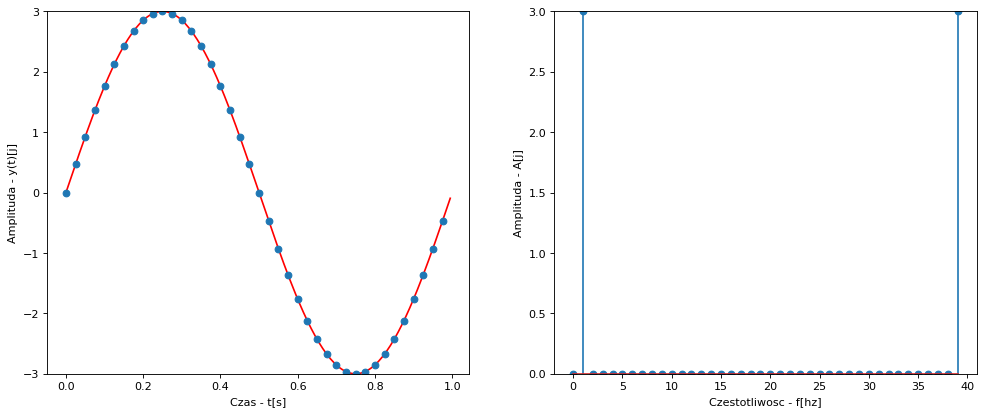

In [8]:
# f=1, A=3, LP=1
many_arguments(f=1, A=3, LP=1)

g) Ile punktów jest na wykresach przy częstotliwości próbkowania 50Hz, T=1s? Zwiększ dwukrotnie liczbę próbek poprzez zwiększenie częstotliwości próbkowania. Następnie: dla $sin(2*pi*f*t)$ porównaj wartość na osi OY spektrum uzyskane w tym oraz poprzednim punkcie.

Odp.:
    -Na wykresach przy częstotliwości próbkowania 50Hz jest 50 punktów. Wartość maksymalna Amplitudy na pikach spektrum jest taka sama, natomias oś OX posiada 2 razy więcej próbek.

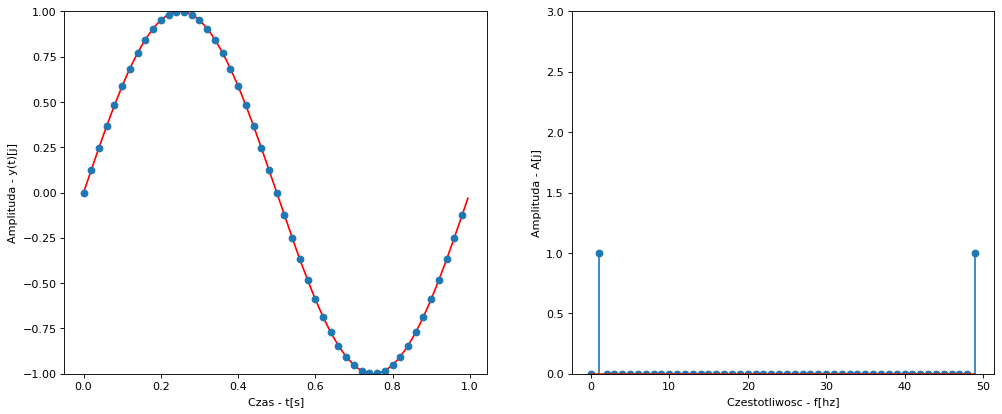

In [24]:
# f=1, w=50, LP=1
many_arguments(f=1, w=50, LP=1)

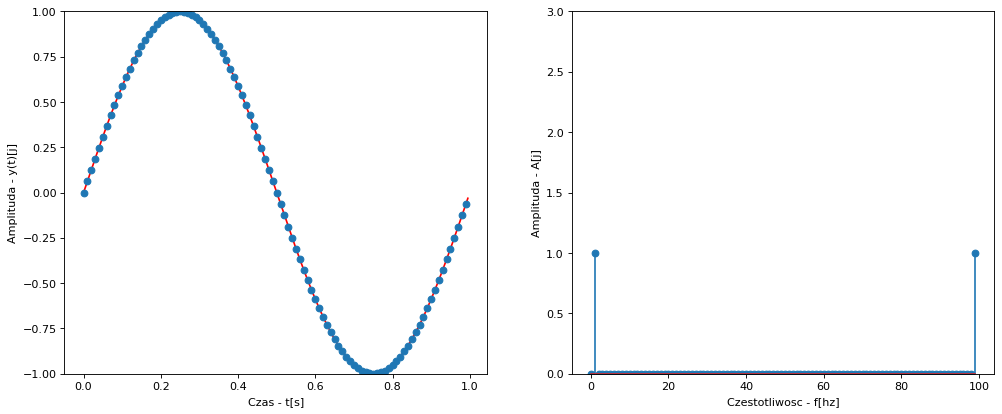

In [25]:
# f=1, w=100, LP=1
many_arguments(f=1, w=100, LP=1)

h) Na podstawie wyników uzyskanych w dwóch poprzednich punktach przeskaluj oś OY spektrum tak, aby wskazywała wartości amplitud badanych sygnałów. Sprawdź wyniki dla kilku wybranych funkcji.

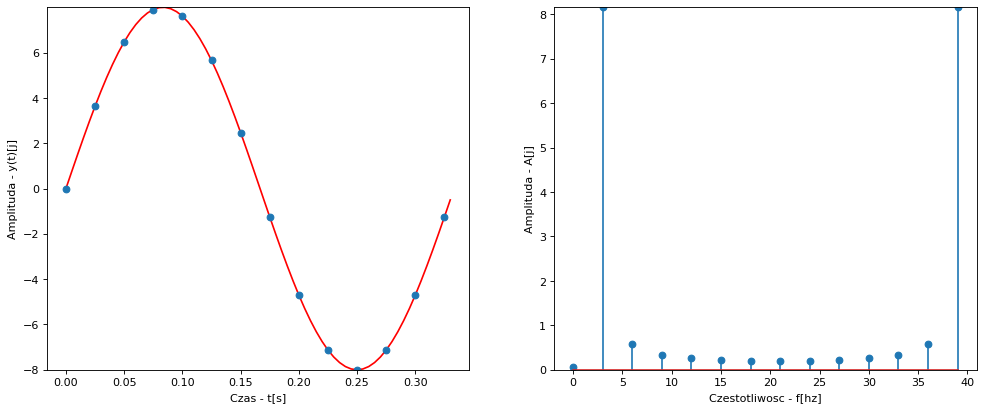

In [9]:
many_arguments(f=3, A=8, LP=1)

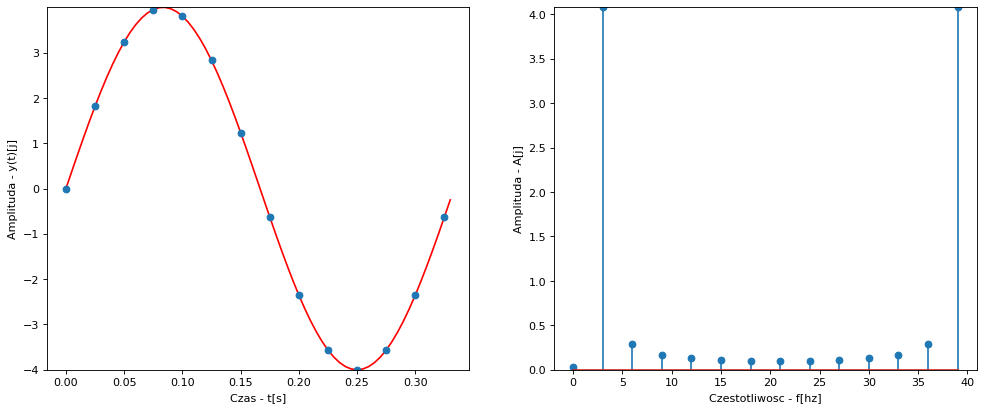

In [10]:
many_arguments(f=3, A=4, LP=1)

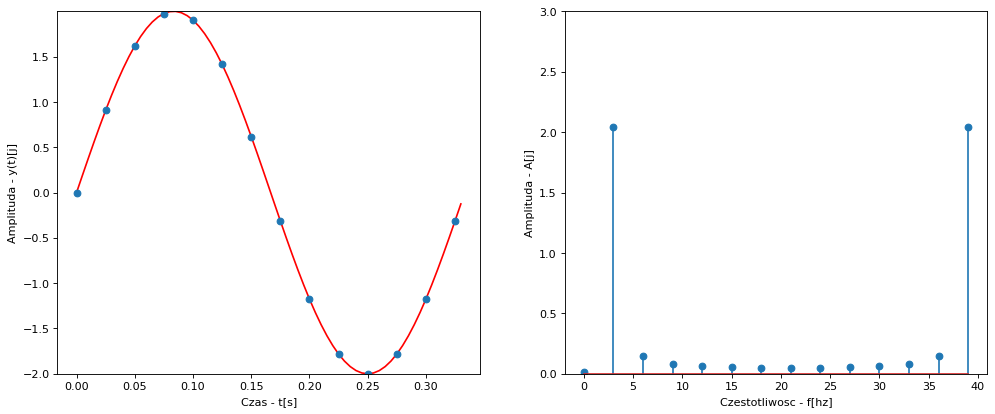

In [11]:
many_arguments(f=3, A=2, LP=1)

# Zadanie 2

a) Wygeneruj spektrum dla funkcji sinus o częstotliwościach 5Hz i 21Hz, dla czestotliwości próbkowania 20Hz i 20 (LP=20) analizowanych przebiegów. Czy rozpoznajesz te funkcje patrząc na ich spróbkowane wykresy? Odczytaj w drugim przypadku uzyskaną częstotliwość z FFT. Dlaczego uzyskano taki wynik?

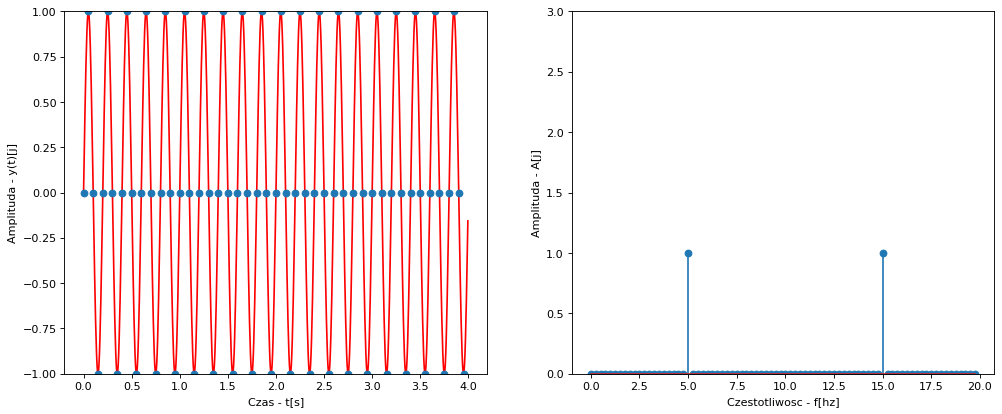

In [28]:
# f=5, w=20, LP=20
many_arguments(f=5, w=20, LP=20)

Częstotliwość z szybkiej transformacji Fouriera wynosi 5Hz.


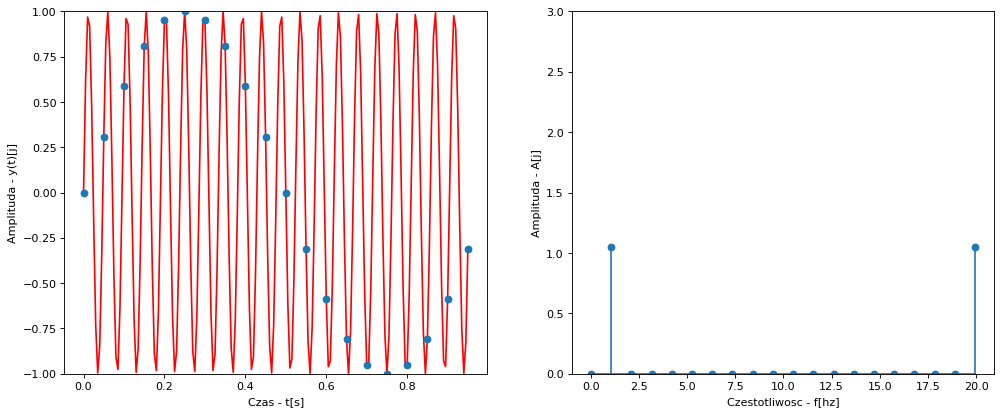

In [6]:
# f=21, w=20, LP=20
many(f=21, w=20, LP=20)

In [5]:
# Zdefiniuj funckję
def many(A = 1,w = 40,LP = 1, f = 2.0):

    T = 1.0/f        
    # Okres sygnalu [s] (jak długo trwa jeden przebieg sinusa)

    TW = 1.0/w        
    # Okres probkowania [s] (co ile sekund pobieramy próbkę)

    t = np.arange(0, LP*T, TW)
    # generujemy momenty, w których pobieramy próbki

    n = len(t)
        
    FUNC = lambda t : A*sin(2*pi*t*f) 
    # def. funkcji (tutaj sinus)

    signal = FUNC(t)                 
    # funkcja sprobkowana

    fig = plt.figure(figsize=(15, 6), dpi=80)   
    ax = fig.add_subplot(121)
    ## --- POMOCNICZY SYGNAL
    base_t = np.arange(0, LP*T, 1.0/200.0)
    base_signal = FUNC(base_t)
    ax.plot(base_t, base_signal, linestyle='-', color='red')
    ax.set_ylim([min(base_signal), max(base_signal)])
    ## --- 
    ax.plot(t, signal, 'o')

    signal1 = fft(signal)
    # sygnal w dziedzinie czestotliwosci 
    signal1 = abs(signal1)    
    signal1 = [x*2*f/(w*LP)  for x in signal1]
    # modul sygnalu

    freqs = range(int(n))
    freqs = [x/LP*f for x in freqs ]

    maxfreq = 0
    for x in range(1, int(len(signal) / 2)):
        if signal[x] > maxfreq:
            maxfreq = signal[x]

    for x in range(1, int(len(signal) / 2)):
        if maxfreq == signal[x]:
            print("Częstotliwość z szybkiej transformacji Fouriera wynosi "+str(int(freqs[x]))+"Hz.")

    ax.set_xlabel("Czas - t[s]")
    ax.set_ylabel("Amplituda - y(t)[j]")
    ax = fig.add_subplot(122)
    ymax = max(signal1)
    if (ymax > 3.0):
        ax.set_ylim([0.0,ymax])
    else:
        ax.set_ylim([0.0,3.0])
    stem(freqs, signal1, '-*')

    ax.set_xlabel("Czestotliwosc - f[hz]")
    ax.set_ylabel("Amplituda - A[j]")

    show()

Zwróć uwagę, że spektrum jest symetryczne (poza pierwszym elementem).

b) Przy w=100Hz, przeanalizuj widma sygnałów:

i) $sin(2*pi*t*f)$, $f=10Hz$

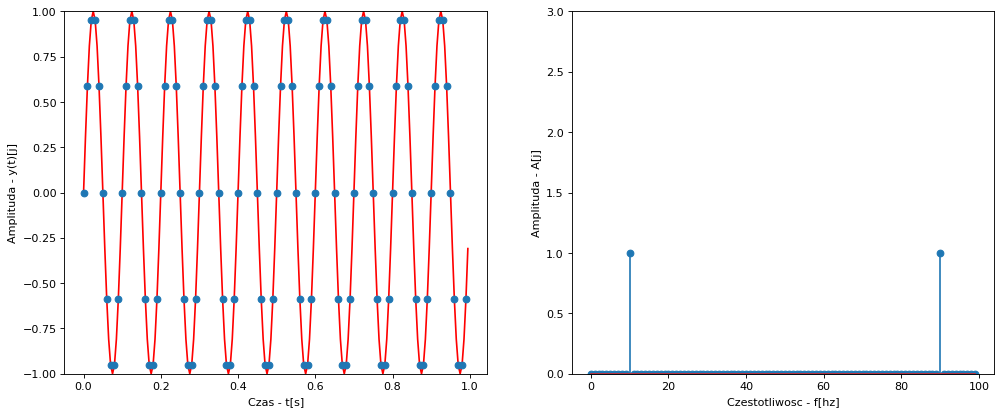

In [14]:
# f=10, w=100, A=1, LP=10
many_arguments(f=10, w=100, A=1, LP=10)

ii) $sin(2*pi*t*f)$, $f=20Hz$

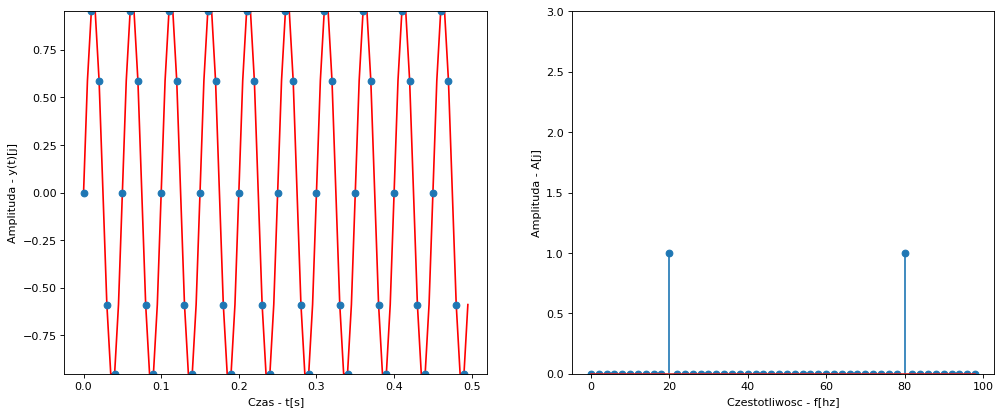

In [15]:
# f=20, w=100, A=1, LP=10
many_arguments(f=20, w=100, A=1, LP=10)

iii) $sin(2*pi*t*f)$, $f=30Hz$ (tutaj słupki nie będą wyglądać idealnie; dlaczego?)

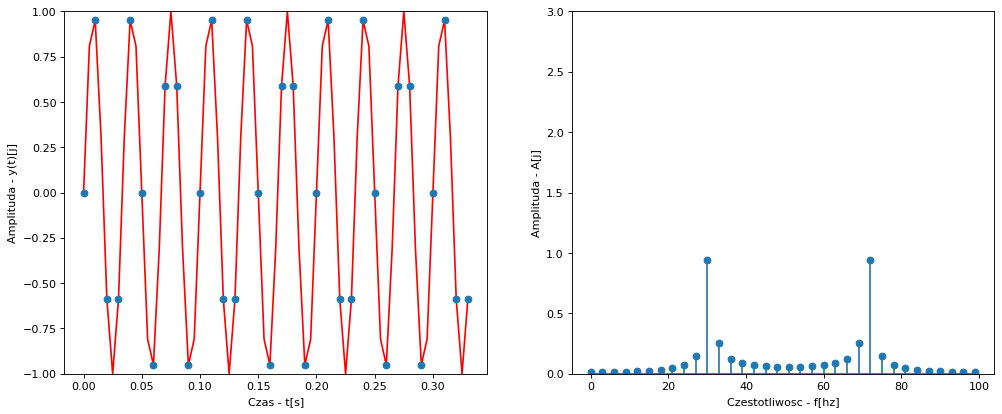

In [33]:
# f=30, w=100, A=1, LP=10
many_arguments(f=30, w=100, A=1, LP=10)

iv) $sin(2*pi*t*f)$, $f=40Hz$

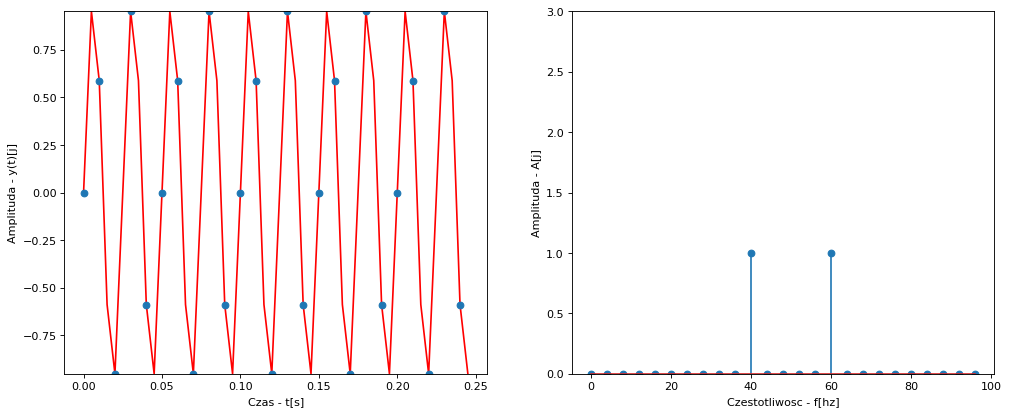

In [16]:
# f=40, w=100, A=1, LP=10
many_arguments(f=40, w=100, A=1, LP=10)

c) Przy F=50Hz, w=100Hz, wygeneruj spektrum dla $sin(2*pi*f*t)$. Zwróć uwagę na skalę wykresów.

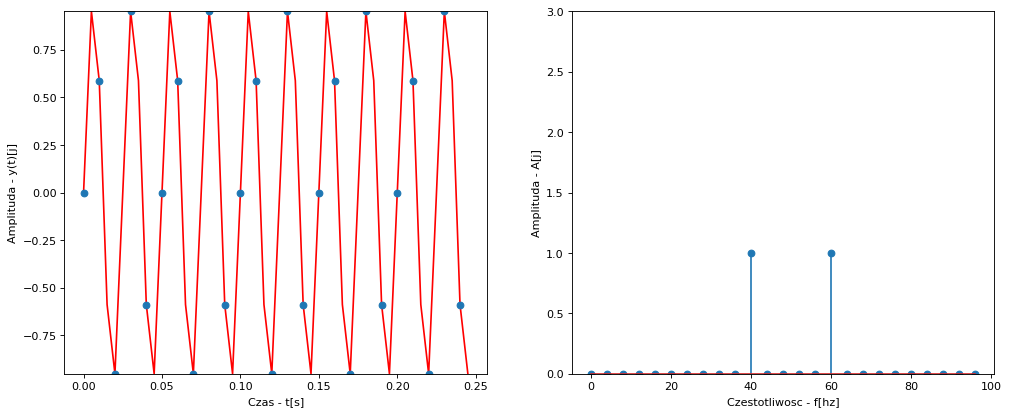

In [17]:
# f=50, w=100, A=1, LP=10
many_arguments(f=40, w=100, A=1, LP=10)

c) Jak się nazywa twierdzenie, którego konsekwencją jest takie zachowanie się spektrum?

Jest to twierdzenie o próbkowaniu (Nyquista–Shannona).

# Zadanie 3

Poniższe przypadki skłądają się z złożonych sygnałów. Trzeba teraz będzie zmodyfikować trochę FUNC

a) $sin(2*pi*t*f) + 2*sin(4*pi*t*f)$, T=1s, w=20Hz.

In [18]:
def func_mod(A = 1,w = 40,LP = 1, f = 2.0):

    T = 1.0/f       
    TW = 1.0/w 
    t = np.arange(0, LP*T, TW)
    n = len(t)

    FUNC = lambda t : (A*sin(2*pi*t*f))+(2*A*sin(4*pi*t*f))   
    # def. funkcji (tutaj sinus)

    signal = FUNC(t)   
    # funkcja sprobkowana

    fig = plt.figure(figsize=(15, 6), dpi=80)   
    ax = fig.add_subplot(121)
    ## --- POMOCNICZY SYGNAL
    base_t = np.arange(0, LP*T, 1.0/200.0)
    base_signal = FUNC(base_t)
    ax.plot(base_t, base_signal, linestyle='-', color='red')
    ax.set_ylim([min(base_signal), max(base_signal)])
    ## --- 
    ax.plot(t, signal, 'o')

    signal1 = fft(signal)
    # sygnal w dziedzinie czestotliwosci 
    signal1 = abs(signal1)    
    signal1 = [x*2*f/(w*LP)  for x in signal1]
    # modul sygnalu

    freqs = range(int(n))
    freqs = [x/n*w for x in freqs]

    ax.set_xlabel("Czas - t[s]")
    ax.set_ylabel("Amplituda - y(t)[j]")
    ax = fig.add_subplot(122)
    ymax = max(signal1)
    if (ymax > 3.0):
        ax.set_ylim([0.0,ymax])
    else:
        ax.set_ylim([0.0,3.0])
    stem(freqs, signal1, '-*')

    ax.set_xlabel("Czestotliwosc - f[hz]")
    ax.set_ylabel("Amplituda - A[j]")

    show()

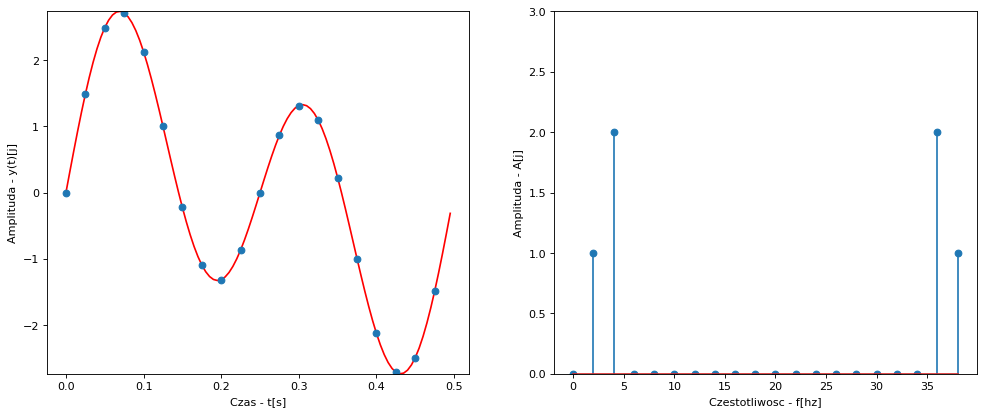

In [19]:
# Wyrysuj sygnał
func_mod()

c) Wygenerujemy trochę szumu. Wychodząc z funkcji sin(2*pi*t*f), dodamy do niej 100 losowych sinusów. Wygenerujemy dla nich losowo amplitudy (z [0.02, 0.08], częstotliwosci: [5.0, 10.0] oraz modyfikacje fazy[0 + 2*pi]. Inne parametry: w=20Hz, T=1s. Czy dla powyższych paramerów losowania, jesteś w stanie odnaleźć bazowy przebieg (sin(2*pi*t))? Czy jesteś w stanie zlokalizować szum?



In [22]:
def szum(A = 1,w = 40,LP = 1,f = 2.0):
    
    T = 1.0/f 
    TW = 1.0/w                
    t = np.arange(0, LP*T, TW) 
    n = len(t)
    
    FUNC = lambda t : A*sin(2*pi*t*f)
    signal = FUNC(t)                 

    for i in range(100):
        signal += uniform(0.02, 0.08)*sin(2*pi*t*uniform(5.0, 10.0)+uniform(0, 2*pi))

    fig = plt.figure(figsize=(15, 6), dpi=80)   
    ax = fig.add_subplot(121)
    ## --- POMOCNICZY SYGNAL
    base_t = np.arange(0, LP*T, 1.0/200.0)
    base_signal = FUNC(base_t)
    ax.plot(base_t, base_signal, linestyle='-', color='red')
    ax.set_ylim([min(base_signal), max(base_signal)])
    
    ax.set_xlabel("Czas - t[s]")
    ax.set_ylabel("Amplituda - y(t)[j]")
    ## --- 
    ax.plot(t, signal, 'o')

    signal1 = fft(signal)
    # sygnal w dziedzinie czestotliwosci 
    signal1 = abs(signal1)/(0.5* int(n))         
    # modul sygnalu

    freqs = linspace(0,1,int(n))


    ax = fig.add_subplot(122)
    ymax = max(signal1)
    ax.set_xlabel("Czestotliwosc - f[hz]")
    ax.set_ylabel("Amplituda - A[j]")
    if (ymax > 3.0):
        ax.set_ylim([0.0,ymax])
    else:
        ax.set_ylim([0.0,3.0])
    stem(freqs, signal1, '-*', use_line_collection = True)

    show()

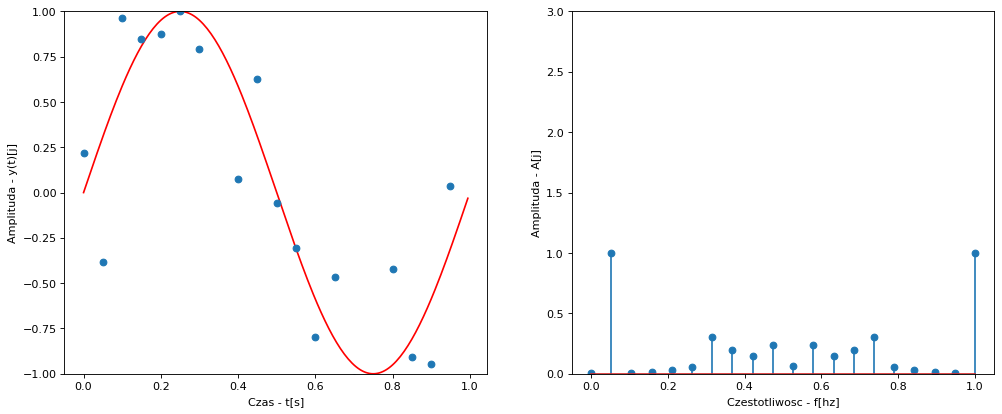

In [23]:
szum(w=20,f=1)

d) $0.5 + 2*sin(2*pi*t*f)$, T=1s, w=20Hz. Czy amplituda zerowego prążka jest prawidłowa? Dlaczego? (Podpowiedź: zwróć jeszcze raz uwagę na “symetrię” spektrum).

In [52]:
def func_mod2(A = 1,w = 40,LP = 1, f = 2.0):

    T = 1.0/f       
    # Okres sygnalu [s] (jak długo trwa jeden przebieg sinusa)

    TW = 1.0/w      
    # Okres probkowania [s] (co ile sekund pobieramy próbkę)

    t = np.arange(0, LP*T, TW)
    # generujemy momenty, w których pobieramy próbki

    n = len(t)

    FUNC = lambda t : (0.5 + A*sin(2*pi*t*f))
    # def. funkcji (tutaj sinus)

    signal = FUNC(t)   
    # funkcja sprobkowana

    fig = plt.figure(figsize=(15, 6), dpi=80)   
    ax = fig.add_subplot(121)
    ## --- POMOCNICZY SYGNAL
    base_t = np.arange(0, LP*T, 1.0/200.0)
    base_signal = FUNC(base_t)
    ax.plot(base_t, base_signal, linestyle='-', color='red')
    ax.set_ylim([min(base_signal), max(base_signal)])
    ## --- 
    ax.plot(t, signal, 'o')

    signal1 = fft(signal)
    # sygnal w dziedzinie czestotliwosci 
    signal1 = abs(signal1)    
    signal1 = [x*2*f/(w*LP)  for x in signal1]
    signal1[0]=signal1[0]/2
    # modul sygnalu

    freqs = range(int(n))
    freqs = [x/n*w for x in freqs]

    ax.set_xlabel("Czas - t[s]")
    ax.set_ylabel("Amplituda - y(t)[j]")
    ax = fig.add_subplot(122)
    ymax = max(signal1)
    if (ymax > 3.0):
        ax.set_ylim([0.0,ymax])
    else:
        ax.set_ylim([0.0,3.0])
    stem(freqs, signal1, '-*')

    ax.set_xlabel("Czestotliwosc - f[hz]")
    ax.set_ylabel("Amplituda - A[j]")

    show()


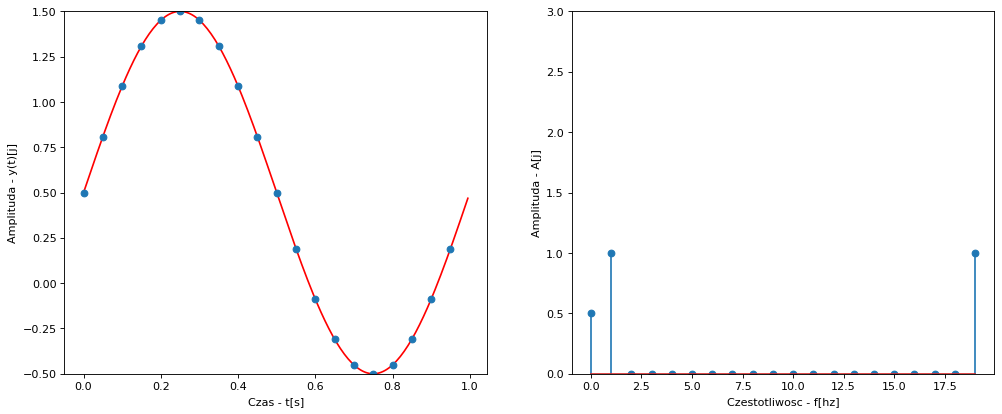

In [53]:
func_mod2(w=20,f=1.0)

e) $sin(2*pi*t*f)$ oraz $sin(2*pi*t*f + pi/4)$ dla T=1s, w=20Hz. Czy informacja o fazie zniknęła? Poszukaj śladów tej informacji w tablicy, będącej wynikiem operacji fft(signal). (funkcja angle(sygnal, deg=True)

In [59]:
# faza = 0
def func_mod3(A = 1,w = 20,LP = 1, f = 1.0):

    T = 1.0/f       
    # Okres sygnalu [s] (jak długo trwa jeden przebieg sinusa)

    TW = 1.0/w      
    # Okres probkowania [s] (co ile sekund pobieramy próbkę)

    t = np.arange(0, LP*T, TW)
    # generujemy momenty, w których pobieramy próbki

    n = len(t)

    FUNC = lambda t : A*sin(2*pi*t*f) 
    # def. funkcji (tutaj sinus)

    signal = FUNC(t)   
    # funkcja sprobkowana

    fig = plt.figure(figsize=(15, 6), dpi=80)   
    ax = fig.add_subplot(121)
    ## --- POMOCNICZY SYGNAL
    base_t = np.arange(0, LP*T, 1.0/200.0)
    base_signal = FUNC(base_t)
    ax.plot(base_t, base_signal, linestyle='-', color='red')
    ax.set_ylim([min(base_signal), max(base_signal)])
    ## --- 
    ax.plot(t, signal, 'o')

    signal1 = fft(signal)
    # sygnal w dziedzinie czestotliwosci 
    signal1 = abs(signal1)    
    signal1 = [x*2*f/(w*LP)  for x in signal1]
    signal1[0]=signal1[0]/2
    # modul sygnalu

    freqs = range(int(n))
    freqs = [x/n*w for x in freqs]

    ax.set_xlabel("Czas - t[s]")
    ax.set_ylabel("Amplituda - y(t)[j]")
    ax = fig.add_subplot(122)
    ymax = max(signal1)
    if (ymax > 3.0):
        ax.set_ylim([0.0,ymax])
    else:
        ax.set_ylim([0.0,3.0])
    stem(freqs, signal1, '-*')

    ax.set_xlabel("Czestotliwosc - f[hz]")
    ax.set_ylabel("Amplituda - A[j]")

    show()



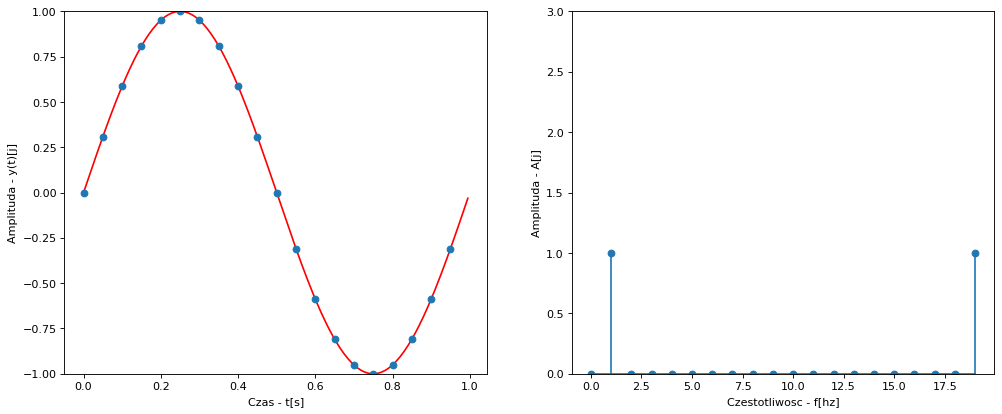

In [60]:
func_mod3()

In [65]:
# faza = pi/4
def func_mod4(A = 1,w = 20,LP = 1, f = 1.0):

    T = 1.0/f       
    # Okres sygnalu [s] (jak długo trwa jeden przebieg sinusa)

    TW = 1.0/w      
    # Okres probkowania [s] (co ile sekund pobieramy próbkę)

    t = np.arange(0, LP*T, TW)
    # generujemy momenty, w których pobieramy próbki

    n = len(t)

    FUNC = lambda t : A*sin(2*pi*t*f+pi/4) 
    # def. funkcji (tutaj sinus)

    signal = FUNC(t)   
    # funkcja sprobkowana

    fig = plt.figure(figsize=(15, 6), dpi=80)   
    ax = fig.add_subplot(121)
    ## --- POMOCNICZY SYGNAL
    base_t = np.arange(0, LP*T, 1.0/200.0)
    base_signal = FUNC(base_t)
    ax.plot(base_t, base_signal, linestyle='-', color='red')
    ax.set_ylim([min(base_signal), max(base_signal)])
    ## --- 
    ax.plot(t, signal, 'o')

    signal1 = fft(signal)
    # sygnal w dziedzinie czestotliwosci 
    signal1 = abs(signal1)    
    signal1 = [x*2*f/(w*LP)  for x in signal1]
    signal1[0]=signal1[0]/2
    # modul sygnalu

    freqs = range(int(n))
    freqs = [x/n*w for x in freqs]

    ax.set_xlabel("Czas - t[s]")
    ax.set_ylabel("Amplituda - y(t)[j]")
    ax = fig.add_subplot(122)
    ymax = max(signal1)
    if (ymax > 3.0):
        ax.set_ylim([0.0,ymax])
    else:
        ax.set_ylim([0.0,3.0])
    stem(freqs, signal1, '-*')

    ax.set_xlabel("Czestotliwosc - f[hz]")
    ax.set_ylabel("Amplituda - A[j]")

    show()


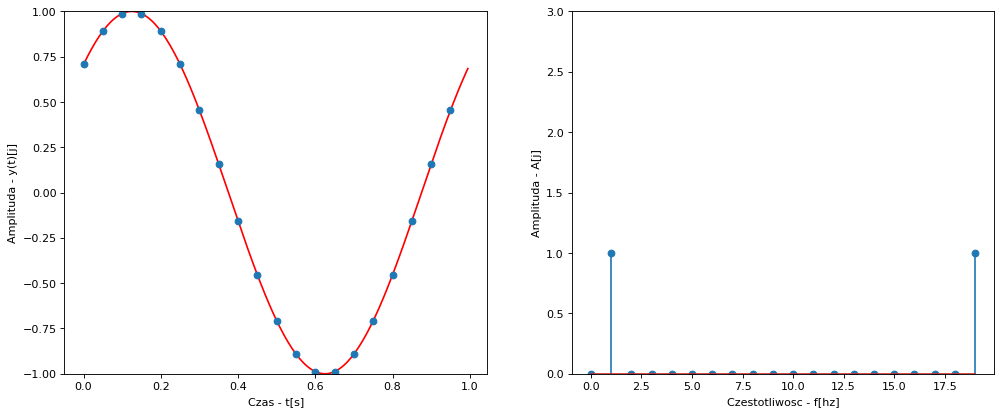

In [66]:
func_mod4()

# Zadanie 4

Oblicz wynik ifft(fft(x)), gdzie x=random.random(10). Czy jakaś informacja została stracona?

In [25]:
# wygeneruj wektor x
x=np.random.random(10)
x

array([0.92419832, 0.11253666, 0.26166099, 0.72537453, 0.0513117 ,
       0.20521246, 0.8589788 , 0.23481882, 0.68788393, 0.5471369 ])

In [26]:
# oblicz fft z x
fft(x)

array([4.6091131 +0.j        , 0.51294196+0.66900233j,
       0.06954564+0.1840613j , 0.80504551+1.2192803j ,
       0.44942476-1.09119152j, 0.95895438+0.j        ,
       0.44942476+1.09119152j, 0.80504551-1.2192803j ,
       0.06954564-0.1840613j , 0.51294196-0.66900233j])

In [27]:
# oblicz ifft
ifft(fft(x))

array([0.92419832+2.22044605e-17j, 0.11253666+0.00000000e+00j,
       0.26166099-3.69729278e-18j, 0.72537453-1.58382726e-17j,
       0.0513117 -2.44895131e-17j, 0.20521246-9.78859081e-18j,
       0.8589788 -1.14380587e-17j, 0.23481882+9.78859081e-18j,
       0.68788393+1.74204041e-17j, 0.5471369 +1.58382726e-17j])

In [28]:
#porownaj x z ifft(fft(x)), wystarczy print
print("x:")
print(x)
print()
print("ifft(fft(x)):")
print(ifft(fft(x)))

x:
[0.92419832 0.11253666 0.26166099 0.72537453 0.0513117  0.20521246
 0.8589788  0.23481882 0.68788393 0.5471369 ]

ifft(fft(x)):
[0.92419832+2.22044605e-17j 0.11253666+0.00000000e+00j
 0.26166099-3.69729278e-18j 0.72537453-1.58382726e-17j
 0.0513117 -2.44895131e-17j 0.20521246-9.78859081e-18j
 0.8589788 -1.14380587e-17j 0.23481882+9.78859081e-18j
 0.68788393+1.74204041e-17j 0.5471369 +1.58382726e-17j]
